# Лабораторная работа №2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
## 1) Обработка пропусков

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

Используем [данные](https://www.kaggle.com/zynicide/wine-reviews) об отзывах на вино, включая комментарии, цену, местонахождение.

In [3]:
data = pd.read_csv('data/winemag-data-130k-v2.csv', sep=',')

In [4]:
data.shape

(129971, 14)

In [5]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 129971


### Простая стратегия - удалить колонки и строки с пропусками:

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((129971, 14), (129971, 5))

In [10]:
data_new_1.isnull().sum()

Unnamed: 0     0
description    0
points         0
title          0
winery         0
dtype: int64

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((129971, 14), (22387, 14))

Таким образом мы либо удалили из датасета много признаков, включая довольно важные, например, сорты винограда. Либо удалили из данных более, чем 100 000 строк, что тоже не есть хорошо. Это не совсем корректные подходы.

In [12]:
mising_count = data.isnull().sum()
all_count = data.isnull().count()
pd.concat([mising_count.sort_values(), (mising_count/all_count*100).sort_values()], 
          axis=1, keys=['Количество пропусков', 'Процент пропусков'])

Количество пропусков  Процент пропусков
Unnamed: 0                                0           0.000000
description                               0           0.000000
points                                    0           0.000000
title                                     0           0.000000
winery                                    0           0.000000
variety                                   1           0.000769
country                                  63           0.048472
province                                 63           0.048472
price                                  8996           6.921544
region_1                              21247          16.347493
taster_name                           26244          20.192197
taster_twitter_handle                 31213          24.015357
designation                           37465          28.825661
region_2                              79460          61.136715

Аккаунт в социальной сети Твиттер для нас не так важен, можно удалить данный столбец вместе с пропусками в нём. Это будет более корректно, чем пытаться заполнять этот признак чем-то. Также имеет смысл удалить столбец "region_2", поскольку там, во-первых, 60% пропусков, во-вторых это далеко не самый важный признак.

In [13]:
data = data.drop('region_2', 1)

In [14]:
data = data.drop('taster_twitter_handle', 1)

In [15]:
data.isnull().sum()

Unnamed: 0         0
country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

In [16]:
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1         taster_name  \
0                 Etna       Kerin O’Keefe   
1                  NaN          Roger Voss   
2    Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore  Alexander Peartree   
4    Willamette Valley        Paul Gregutt   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

### Простая стратегия - заполнить пропущенные значения нулями 

In [17]:
# В данном случае это будет некорректно, поскольку нулями заполнится и цена, и категориальные признаки.
data_new_3 = data.fillna(0)
data_new_3.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    0.0  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                   0      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1         taster_name  \
0                 Etna       Kerin O’Keefe   
1                    0          Roger Voss   
2    Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore  Alexander Peartree   
4    Willamette Valley        Paul Gregutt   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [18]:
data_new_3.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

### "Внедрение значений" - импьютация

#### Обработка пропусков в числовых данных

In [43]:
data.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [20]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if (temp_null_count>0) and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка price. Тип данных float64. Количество пустых значений 8996, 6.92%.


In [21]:
# Колонка с пропущенным значением
data_num = data[num_cols]
data_num

price
0         NaN
1        15.0
2        14.0
3        13.0
4        65.0
...       ...
129966   28.0
129967   75.0
129968   30.0
129969   32.0
129970   21.0

[129971 rows x 1 columns]

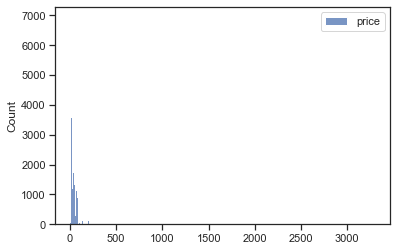

In [44]:
# Гистограмма
myplot = sns.histplot(data_num)

In [23]:
data_num_Price = data_num[['price']]
data_num_Price.head()

price
0    NaN
1   15.0
2   14.0
3   13.0
4   65.0

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [25]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_where_missing_values = indicator.fit_transform(data_num_Price)
mask_where_missing_values

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
strategies=['mean', 'median', 'most_frequent']

In [27]:
def test_inpute(strategy_param):
    impute_num = SimpleImputer(strategy=strategy_param)
    data_num_impute = impute_num.fit_transform(data_num_Price)
    return data_num_impute[mask_where_missing_values]

In [28]:
strategies[0], test_inpute(strategies[0])

('mean',
 array([35.36338913, 35.36338913, 35.36338913, ..., 35.36338913,
        35.36338913, 35.36338913]))

In [29]:
strategies[1], test_inpute(strategies[1])

('median', array([25., 25., 25., ..., 25., 25., 25.]))

In [30]:
strategies[2], test_inpute(strategies[2])

('most_frequent', array([20., 20., 20., ..., 20., 20., 20.]))

In [31]:
data_num.describe()

price
count  120975.000000
mean       35.363389
std        41.022218
min         4.000000
25%        17.000000
50%        25.000000
75%        42.000000
max      3300.000000

In [32]:
# Функция, позволяющая задать колонку значений и стретегию вменения значений
def test_impute_clever(dataset, col, strategy_param):
    imp_data = dataset[[col]]
    # Indicator
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(imp_data)
    # Imputer
    imputer = SimpleImputer(strategy=strategy_param)
    data_impute = imputer.fit_transform(imp_data)

    imputing_data = data_impute[mask_missing_values_only]
    
    return col, strategy_param, imputing_data.size, imputing_data[0], imputing_data[imputing_data.size - 1]
    

In [33]:
test_impute_clever(data, 'price', strategies[0])

('price', 'mean', 8996, 35.363389129985535, 35.363389129985535)

In [45]:
test_impute_clever(data, 'price', strategies[1])

('price', 'median', 8996, 25.0, 25.0)

In [35]:
test_impute_clever(data, 'price', strategies[2])

('price', 'most_frequent', 8996, 20.0, 20.0)

### Обработка пропусков в категориальных данных

In [36]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if (temp_null_count>0) and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 63, 0.05%.
Колонка designation. Тип данных object. Количество пустых значений 37465, 28.83%.
Колонка province. Тип данных object. Количество пустых значений 63, 0.05%.
Колонка region_1. Тип данных object. Количество пустых значений 21247, 16.35%.
Колонка taster_name. Тип данных object. Количество пустых значений 26244, 20.19%.
Колонка variety. Тип данных object. Количество пустых значений 1, 0.0%.


In [37]:
data.loc[data['variety'].isnull()]

Unnamed: 0 country                                        description  \
86909       86909   Chile  A chalky, dusty mouthfeel nicely balances this...   

      designation  points  price      province region_1 taster_name  \
86909         NaN      88   17.0  Maipo Valley      NaN         NaN   

                             title variety  winery  
86909  Carmen 1999  (Maipo Valley)     NaN  Carmen

Мы видим, что в колонке VARIETY (сорт винограда) пропущено лишь одно значение. Посмотрев пару записей видно, что иногда сорт зависит от TITLE (марки обзора). Попробуем найти похожие TITLE и заполнить соответствующий VARIETY, в проивном случае удалим эту строку.

Мы нашли такие строки, в которых сорт винограда был "Carmenere". Заполним им VARIETY

In [38]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Carmenère')
helper = imp3.fit_transform(data[['variety']])
helper

array([['White Blend'],
       ['Portuguese Red'],
       ['Pinot Gris'],
       ...,
       ['Gewürztraminer'],
       ['Pinot Gris'],
       ['Gewürztraminer']], dtype=object)

In [39]:
data['variety'] = helper

In [40]:
data.loc[data['variety'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, taster_name, title, variety, winery]
Index: []

In [41]:
data.loc[data['Unnamed: 0'] == 86909]

Unnamed: 0 country                                        description  \
86909       86909   Chile  A chalky, dusty mouthfeel nicely balances this...   

      designation  points  price      province region_1 taster_name  \
86909         NaN      88   17.0  Maipo Valley      NaN         NaN   

                             title    variety  winery  
86909  Carmen 1999  (Maipo Valley)  Carmenère  Carmen

Таким образом, зменили в строку 86909 в столбец VARIETY значение  `'Carmenère'`


Поработаем теперь с колонкой TASTER_NAME (имя дегустатора). Нет смысла изменять его на наиболее встречающееся, но можно заменить все пропущенные имена на индекс записи этого дегустатора. Для этого сделаем отдельный датафрейм, где создадим колонку, в которую запишем значения индекса, которые специально сохраним для этого. После чего заменим эту колонку на колонку с пропущенными значениями по индексам, которые мы специально сохранили.

In [48]:
x = (data.loc[data['taster_name'].isnull()].reset_index().eval("main_taster_name = index").set_index('index'))
x

Unnamed: 0 country                                        description  \
index                                                                           
31              31   Italy  Merlot and Nero d'Avola form the base for this...   
32              32   Italy  Part of the extended Calanìca series, this Gri...   
33              33      US  Rustic and dry, this has flavors of berries, c...   
34              34      US  This shows a tart, green gooseberry flavor tha...   
37              37   Italy  This concentrated Cabernet offers aromas of cu...   
...            ...     ...                                                ...   
129852      129852   Italy  Here's an easy blend of Cabernet Sauvignon and...   
129914      129914      US  Fritz has made tremendous progress with Cab ov...   
129920      129920      US  Shows the clean, citrus acid juiciness and sil...   
129929      129929   Italy  This luminous sparkler has a sweet, fruit-forw...   
129940      129940      US  This is the winery's bells and whistles Chardo...   

                         designation  points  price           province  \
index                                                                    
31      Calanìca Nero d'Avola-Merlot      86    NaN  Sicily & Sardinia   
32          Calanìca Grillo-Viognier      86    NaN  Sicily & Sardinia   
33             Puma Springs Vineyard      86   50.0         California   
34                               NaN      86   20.0         California   
37                           Missoni      86   21.0  Sicily & Sardinia   
...                              ...     ...    ...                ...   
129852                           NaN      86   10.0  Sicily & Sardinia   
129914                           NaN      91   35.0         California   
129920           Fiddlestix Vineyard      91   48.0         California   
129929                           NaN      91   38.0             Veneto   
129940               Watson Vineyard      91   36.0         California   

                              region_1 taster_name  \
index                                                
31                             Sicilia         NaN   
32                             Sicilia         NaN   
33                    Dry Creek Valley         NaN   
34                       Sonoma Valley         NaN   
37                             Sicilia         NaN   
...                                ...         ...   
129852                         Sicilia         NaN   
129914                Dry Creek Valley         NaN   
129920                 Sta. Rita Hills         NaN   
129929  Prosecco Superiore di Cartizze         NaN   
129940                       Mendocino         NaN   

                                                    title  \
index                                                       
31      Duca di Salaparuta 2010 Calanìca Nero d'Avola-...   
32      Duca di Salaparuta 2011 Calanìca Grillo-Viogni...   
33      Envolve 2010 Puma Springs Vineyard Red (Dry Cr...   
34           Envolve 2011 Sauvignon Blanc (Sonoma Valley)   
37      Feudi del Pisciotto 2010 Missoni Cabernet Sauv...   
...                                                   ...   
129852  MandraRossa 2006 Cabernet Sauvignon-Shiraz (Si...   
129914   Fritz 2005 Cabernet Sauvignon (Dry Creek Valley)   
129920  Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....   
129929  Col Vetoraz Spumanti NV  Prosecco Superiore di...   
129940  Standish 2006 Watson Vineyard Chardonnay (Mend...   

                          variety                winery  main_taster_name  
index                                                                      
31                      Red Blend    Duca di Salaparuta                31  
32                    White Blend    Duca di Salaparuta                32  
33                      Red Blend               Envolve                33  
34                Sauvignon Blanc               Envolve                34  
37             Cabernet Sauvignon   Fe

In [49]:
# Заполним пропущенные значения (pandas сам найдет нужные строки по совпадающим значениям индекса)
data['taster_name'] = data['taster_name'].fillna(x['main_taster_name'])
print(data['taster_name'][31],'/',
data['taster_name'][2345])

31.0 / Jim Gordon


Таким образом мы заполнили соответствующие неизвестные имена соответствующими индексами записей

In [52]:
data['taster_name'].isnull().sum()

0

Теперь заменим значения COUNTRY какой-либо консантой, так как пропусков всего 0.05%. 

In [53]:
data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [54]:
indicator = MissingIndicator()
mask_where_missing_values = indicator.fit_transform(data[['country']])
mask_where_missing_values

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [55]:
# Так как среди значений нет RUS, заменим на RUS
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='RUS')
helper = imp3.fit_transform(data[['country']])
helper

array([['Italy'],
       ['Portugal'],
       ['US'],
       ...,
       ['France'],
       ['France'],
       ['France']], dtype=object)

In [56]:
helper.shape

(129971, 1)

In [57]:
np.unique(helper)

array(['Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Morocco', 'New Zealand', 'Peru', 'Portugal', 'RUS',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
       'Spain', 'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'],
      dtype=object)

In [58]:
data['country'].isnull().sum()

63

In [59]:
data['country'] = helper

In [60]:
data['country'].isnull().sum()

0

In [61]:
aaa

NameError: name 'aaa' is not defined

In [188]:
for row in aaa.itertuples():
    if all([(pd.isna(row.B)), (pd.isna(row.C))]): 
        print('hahaha')
    else: print(row)

Pandas(Index=0, A=1.0, B=1.0, C=0.0, D=0)
Pandas(Index=1, A=88.0, B=2.0, C=1.0, D=2)
Pandas(Index=2, A=3.0, B=2.0, C=2.0, D=4)
hahaha
Pandas(Index=4, A=6.0, B=2.0, C=4.0, D=8)
Pandas(Index=5, A=7.0, B=5.0, C=5.0, D=10)
Pandas(Index=6, A=9.0, B=7.0, C=6.0, D=12)
Pandas(Index=7, A=1.0, B=9.0, C=7.0, D=14)


In [62]:
c = 0
for row in data.itertuples():
    if all([(pd.isna(row.designation)), (pd.isna(row.province)), (pd.isna(row.region_1))]): 
        c = c + 1
        print(row)

Pandas(Index=11150, _1=11150, country='RUS', description='A blend of 85% Melnik, 10% Grenache Noir and 5% Petit Verdot, this wine has aromas of saddle leather, cassis and dark chocolate. In the mouth there are flavors of cherry, chocolate and dried blueberry. It has good balance with a soft tannic finish.', designation=nan, points=89, price=20.0, province=nan, region_1=nan, taster_name='Jeff Jenssen', title='Orbelus 2013 Melnik', variety='Melnik', winery='Orbelus')
Pandas(Index=26485, _1=26485, country='RUS', description='This wine has aromas of black berry, dried red raspberry and blueberry. In the mouth there are flavors of blueberry juice and black plum. The finish is slightly jammy yet persistent.', designation=nan, points=87, price=13.0, province=nan, region_1=nan, taster_name='Jeff Jenssen', title='Stone Castle 2013 Shiraz', variety='Shiraz', winery='Stone Castle')
Pandas(Index=26486, _1=26486, country='RUS', description='Aromas of green apple and white flowers prepare the palate

In [63]:
print(c)

11


Таким образом, у нас есть 11 строк, где пропущено сразу и провинция, и регион, и название виноградника в винодельне. Слишком много пропусков в одной строке. Удалим все эти 11 строк.

In [65]:
pop = list()

In [66]:
# Выведем индексы строк
for row in data.itertuples():
    if all([(pd.isna(row.designation)), (pd.isna(row.province)), (pd.isna(row.region_1))]): 
        print(row.Index)
        pop.append(row.Index)

11150
26485
26486
27822
49510
85602
90151
106170
119787
120799
129900


In [67]:
data.loc[data['Unnamed: 0']==11150]

Unnamed: 0 country                                        description  \
11150       11150     RUS  A blend of 85% Melnik, 10% Grenache Noir and 5...   

      designation  points  price province region_1   taster_name  \
11150         NaN      89   20.0      NaN      NaN  Jeff Jenssen   

                     title variety   winery  
11150  Orbelus 2013 Melnik  Melnik  Orbelus

In [68]:
test1 = data.loc[~data['Unnamed: 0'].isin(pop)]
test1.loc[test1['Unnamed: 0']==11150]

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, taster_name, title, variety, winery]
Index: []

In [69]:
test1.loc[test1['Unnamed: 0']==90151]

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, taster_name, title, variety, winery]
Index: []

Таким образом, мы удалили из data 11 строк, в которых три вышеназванных колонки пустые

Заменим теперь все остальные значения. PROVINCE заменим на наиболее часто встречабщееся, ведь пропусков всего 63. Остальные же (DESIGNATION и REGION_1) заменим на какие-нибудь константы, так как пропусков много, а заменять на что-то уже присутствующее слишком увеличит количество значений.

In [70]:
prov_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
prov_helper = prov_imp.fit_transform(test1[['province']])
prov_helper

array([['Sicily & Sardinia'],
       ['Douro'],
       ['Oregon'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

In [71]:
np.unique(prov_helper)

array(['Achaia', 'Aconcagua Costa', 'Aconcagua Valley', 'Aegean',
       'Agioritikos', 'Ahr', 'Alenquer', 'Alentejano', 'Alentejo',
       'Alenteo', 'Algarve', 'Alsace', 'America', 'Amindeo', 'Amyndeon',
       'Andalucia', 'Ankara', 'Apalta', 'Arcadia', 'Arizona', 'Armenia',
       'Atalanti Valley', 'Atlantida', 'Attica', 'Australia Other',
       'Austria', 'Awatere Valley', 'Baden', 'Bairrada', 'Beaujolais',
       'Beira Atlantico', 'Beira Interior', 'Beiras', 'Bekaa Valley',
       'Beotia', 'Black Sea Coastal', 'Bordeaux', 'Bot River', 'Brazil',
       'Brda', 'Breede River Valley', 'Breedekloof', 'British Columbia',
       'Bucelas', 'Buin', 'Bulgaria', 'Burgenland', 'Burgundy',
       'Bío Bío Valley', 'Cachapoal Valley', 'Cahul', 'California',
       'Campanha', 'Canada Other', 'Canelones', 'Canterbury',
       'Cape Agulhas', 'Cape Peninsula', 'Cape South Coast', 'Cappadocia',
       'Carnuntum', 'Casablanca & Leyda Valleys', 'Casablanca Valley',
       'Casablanca-Curicó 

In [72]:
desig_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown_Vineyard')
desig_helper = desig_imp.fit_transform(test1[['designation']])
desig_helper

array([['Vulkà Bianco'],
       ['Avidagos'],
       ['Unknown_Vineyard'],
       ...,
       ['Kritt'],
       ['Unknown_Vineyard'],
       ['Lieu-dit Harth Cuvée Caroline']], dtype=object)

In [73]:
np.unique(desig_helper)

array(['#19 Phantom Limb Belmont Vineyard', '#50 Mon Chou',
       '#SocialSecret', ..., '“Champ” Jim the Gent',
       "“Champ” Lightnin' Lane", '“P”'], dtype=object)

In [74]:
region_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown_Region')
region_helper = region_imp.fit_transform(test1[['region_1']])
region_helper

array([['Etna'],
       ['Unknown_Region'],
       ['Willamette Valley'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

## 2) Преобразование категориальных признаков в числовые

In [75]:
data.dtypes


Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [79]:
test1.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

С отдельными категориальными признаками будем работать с отдельными переменными, обозначающими отдельные колонки, например, REGION_HELPER и подобное. С теми же признаками, которым мы не отвели отдельные переменные, мы будем работать через датафрейм TEST1 так как в нем у нас нет строк, где три значения (region_2 designation province) пустые.

In [80]:
test1.loc[test1['Unnamed: 0'] == 31]

Unnamed: 0 country                                        description  \
31          31   Italy  Merlot and Nero d'Avola form the base for this...   

                     designation  points  price           province region_1  \
31  Calanìca Nero d'Avola-Merlot      86    NaN  Sicily & Sardinia  Sicilia   

   taster_name                                              title    variety  \
31          31  Duca di Salaparuta 2010 Calanìca Nero d'Avola-...  Red Blend   

                winery  
31  Duca di Salaparuta

In [81]:
test1.isnull().sum()

Unnamed: 0         0
country            0
description        0
designation    37454
points             0
price           8996
province          52
region_1       21236
taster_name        0
title              0
variety            0
winery             0
dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Кодируем Description

In [87]:
# DESCRIPTION, а именно комментарий дегустартора, закодируем целочисленными значениями
le_desc = LabelEncoder()
desc_coded_le = le_desc.fit_transform(test1['description'])

In [88]:
desc_coded_le

array([ 16393,  99979,  75447, ..., 115279,   4437,  21600])

In [92]:
np.unique(desc_coded_le)

array([     0,      1,      2, ..., 119942, 119943, 119944])

In [94]:
le_desc.inverse_transform(desc_coded_le)

array(["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
       "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
       'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
       ...,
       'Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2017.',
       'A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked a

### Кодируем Designation

In [97]:
desig_helper

array([['Vulkà Bianco'],
       ['Avidagos'],
       ['Unknown_Vineyard'],
       ...,
       ['Kritt'],
       ['Unknown_Vineyard'],
       ['Lieu-dit Harth Cuvée Caroline']], dtype=object)

In [102]:
desig_data = pd.DataFrame({'Designation': desig_helper.T[0]})
desig_data

Designation
0                                 Vulkà Bianco
1                                     Avidagos
2                             Unknown_Vineyard
3                         Reserve Late Harvest
4           Vintner's Reserve Wild Child Block
...                                        ...
129955  Brauneberger Juffer-Sonnenuhr Spätlese
129956                        Unknown_Vineyard
129957                                   Kritt
129958                        Unknown_Vineyard
129959           Lieu-dit Harth Cuvée Caroline

[129960 rows x 1 columns]

In [103]:
# DESIGNATION закодируем уже методом one-hot с помощью метода pandas.get_dummies
pd.get_dummies(desig_data)

Designation_#19 Phantom Limb Belmont Vineyard  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
129955                                              0   
129956                                              0   
129957                                              0   
129958                                              0   
129959                                              0   

        Designation_#50 Mon Chou  Designation_#SocialSecret  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
129955                         0                          0   
129956                         0                          0   
129957                         0                          0   
129958                         0                          0   
129959                         0                          0   

        Designation_%@#$!  Designation_&  Designation_'61 Rosé  \
0                       0              0                     0   
1                       0              0                     0   
2                       0              0                     0   
3                       0              0                     0   
4                       0              0                     0   
...                   ...            ...                   ...   
129955                  0              0                     0   
129956                  0              0                     0   
129957                  0              0                     0   
129958                  0              0                     0   
129959                  0              0                     0   

        Designation_'A Rina  Designation_'Blend 105' Red Wine  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   
...                     ...                               ...   
129955                    0                                 0   
129956                    0                                 0   
129957                    0                                 0   
129958                    0                                 0   
129959                    0                                 0   

        Designation_'Na Vota  Designation_'P'  ...  \
0                          0                0  ...   
1                          0                0  ...   
2                          0                0  ...   
3                          0                0  ...   
4                          0                0  ...   
...                      ...              ...  ...   
129955                     0                0  ...   
129956                     0                0  ...   
129957                     0                0  ...   
129958                     0                0  ...   
129959                     0                0  ...   

        Designation_Ürziger Würzgarten Kabinett  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                  

### Кодируем Country

In [108]:
# COUNTRY закодируем методом из библиотеки sklearn
ohe_country = OneHotEncoder()
country_coded_ohe = ohe_country.fit_transform(test1[['country']])
country_coded_ohe.shape

(129960, 44)

In [110]:
country_coded_ohe

<129960x44 sparse matrix of type '<class 'numpy.float64'>'
	with 129960 stored elements in Compressed Sparse Row format>

In [112]:
country_coded_ohe.todense()[0:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0

In [114]:
test1['country'].head(5)

0       Italy
1    Portugal
2          US
3          US
4          US
Name: country, dtype: object

### Кодируем Region_1

In [116]:
region_data = pd.DataFrame({'Region': region_helper.T[0]})
region_data

Region
0                      Etna
1            Unknown_Region
2         Willamette Valley
3       Lake Michigan Shore
4         Willamette Valley
...                     ...
129955       Unknown_Region
129956               Oregon
129957               Alsace
129958               Alsace
129959               Alsace

[129960 rows x 1 columns]

In [117]:
# REGION закодируем уже методом one-hot с помощью метода pandas.get_dummies
pd.get_dummies(region_data)

Region_Abruzzo  Region_Adelaida District  Region_Adelaide  \
0                    0                         0                0   
1                    0                         0                0   
2                    0                         0                0   
3                    0                         0                0   
4                    0                         0                0   
...                ...                       ...              ...   
129955               0                         0                0   
129956               0                         0                0   
129957               0                         0                0   
129958               0                         0                0   
129959               0                         0                0   

        Region_Adelaide Hills  Region_Adelaide Plains  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
129955                      0                       0   
129956                      0                       0   
129957                      0                       0   
129958                      0                       0   
129959                      0                       0   

        Region_Aglianico d'Irpinia  Region_Aglianico del Beneventano  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
129955                           0                                 0   
129956                           0                                 0   
129957                           0                                 0   
129958                           0                                 0   
129959                           0                                 0   

        Region_Aglianico del Taburno  Region_Aglianico del Vulture  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
129955                             0                             0   
129956                             0                             0   
129957                             0                             0   
129958                             0                             0   
129959                             0                             0   

        Region_Agrelo  ...  Region_Yadkin Valley  Region_Yakima Valley  \
0                   0  ...                     0                     0   
1                   0  ...                     0                     0   
2                   0  ...                     0                     0   
3                   0  ...                     0                     0   
4                   0  ...                     0                     0   
...               ...  ...                   ...                   ...   
129955              0  ...                     0                     0   
129956              0  ...                     0                     0   
129957              0  ...                     0                     0   
129958              0  ...                     0

### Кодируем Province

In [118]:
prov_helper

array([['Sicily & Sardinia'],
       ['Douro'],
       ['Oregon'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

In [119]:
prov_data = pd.DataFrame({'Province': prov_helper.T[0]})
prov_data

Province
0       Sicily & Sardinia
1                   Douro
2                  Oregon
3                Michigan
4                  Oregon
...                   ...
129955              Mosel
129956             Oregon
129957             Alsace
129958             Alsace
129959             Alsace

[129960 rows x 1 columns]

In [121]:
# PROVINCE закодируем уже методом one-hot с помощью метода pandas.get_dummies
pd.get_dummies(prov_data)

Province_Achaia  Province_Aconcagua Costa  Province_Aconcagua Valley  \
0                     0                         0                          0   
1                     0                         0                          0   
2                     0                         0                          0   
3                     0                         0                          0   
4                     0                         0                          0   
...                 ...                       ...                        ...   
129955                0                         0                          0   
129956                0                         0                          0   
129957                0                         0                          0   
129958                0                         0                          0   
129959                0                         0                          0   

        Province_Aegean  Province_Agioritikos  Province_Ahr  \
0                     0                     0             0   
1                     0                     0             0   
2                     0                     0             0   
3                     0                     0             0   
4                     0                     0             0   
...                 ...                   ...           ...   
129955                0                     0             0   
129956                0                     0             0   
129957                0                     0             0   
129958                0                     0             0   
129959                0                     0             0   

        Province_Alenquer  Province_Alentejano  Province_Alentejo  \
0                       0                    0                  0   
1                       0                    0                  0   
2                       0                    0                  0   
3                       0                    0                  0   
4                       0                    0                  0   
...                   ...                  ...                ...   
129955                  0                    0                  0   
129956                  0                    0                  0   
129957                  0                    0                  0   
129958                  0                    0                  0   
129959                  0                    0                  0   

        Province_Alenteo  ...  Province_Wellington  \
0                      0  ...                    0   
1                      0  ...                    0   
2                      0  ...                    0   
3                      0  ...                    0   
4                      0  ...                    0   
...                  ...  ...                  ...   
129955                 0  ...                    0   
129956                 0  ...                    0   
129957                 0  ...                    0   
129958                 0  ...                    0   
129959                 0  ...                    0   

        Province_Western Australia  Province_Western Cape  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
129955                           0                      0   
129956                           0                      0   
129957                           0                      0   
129958                           0                      0   
129959                           0                      0   

        Province_Wiener Gemischter Satz  Province_Württemberg  \
0             

### Кодируем Title

In [123]:
# TITLE 
le_title = LabelEncoder()
title_coded_le = le_title.fit_transform(test1[['title']])

In [124]:
np.unique(title_coded_le)

array([     0,      1,      2, ..., 118827, 118828, 118829])

### Кодируем Variety

In [125]:
# VARIETY
pd.get_dummies(test1[['variety']])

variety_Abouriou  variety_Agiorgitiko  variety_Aglianico  \
0                      0                    0                  0   
1                      0                    0                  0   
2                      0                    0                  0   
3                      0                    0                  0   
4                      0                    0                  0   
...                  ...                  ...                ...   
129966                 0                    0                  0   
129967                 0                    0                  0   
129968                 0                    0                  0   
129969                 0                    0                  0   
129970                 0                    0                  0   

        variety_Aidani  variety_Airen  variety_Albana  variety_Albanello  \
0                    0              0               0                  0   
1                    0              0               0                  0   
2                    0              0               0                  0   
3                    0              0               0                  0   
4                    0              0               0                  0   
...                ...            ...             ...                ...   
129966               0              0               0                  0   
129967               0              0               0                  0   
129968               0              0               0                  0   
129969               0              0               0                  0   
129970               0              0               0                  0   

        variety_Albariño  variety_Albarossa  variety_Aleatico  ...  \
0                      0                  0                 0  ...   
1                      0                  0                 0  ...   
2                      0                  0                 0  ...   
3                      0                  0                 0  ...   
4                      0                  0                 0  ...   
...                  ...                ...               ...  ...   
129966                 0                  0                 0  ...   
129967                 0                  0                 0  ...   
129968                 0                  0                 0  ...   
129969                 0                  0                 0  ...   
129970                 0                  0                 0  ...   

        variety_Yapincak  variety_Zelen  variety_Zibibbo  variety_Zierfandler  \
0                      0              0                0                    0   
1                      0              0                0                    0   
2                      0              0                0                    0   
3                      0              0                0                    0   
4                      0              0                0                    0   
...                  ...            ...              ...                  ...   
129966                 0              0                0                    0   
129967                 0              0                0                    0   
129968                 0              0                0                    0   
129969                 0              0                0                    0   
129970                 0              0                0                    0   

        variety_Zierfandler-Rotgipfler  variety_Zinfandel  variety_Zlahtina  \
0                                    0                  0                 0   
1                                    0                  0                 0   
2                                    0                  0                 0   
3                                    0                  0                 0   
4                                    0                  0            

### Кодируем Winery

In [126]:
pd.get_dummies(test1[['winery']])

winery_1+1=3  winery_10 Knots  winery_100 Percent Wine  \
0                  0                0                        0   
1                  0                0                        0   
2                  0                0                        0   
3                  0                0                        0   
4                  0                0                        0   
...              ...              ...                      ...   
129966             0                0                        0   
129967             0                0                        0   
129968             0                0                        0   
129969             0                0                        0   
129970             0                0                        0   

        winery_1000 Stories  winery_1070 Green  winery_10Span  \
0                         0                  0              0   
1                         0                  0              0   
2                         0                  0              0   
3                         0                  0              0   
4                         0                  0              0   
...                     ...                ...            ...   
129966                    0                  0              0   
129967                    0                  0              0   
129968                    0                  0              0   
129969                    0                  0              0   
129970                    0                  0              0   

        winery_12 Linajes  winery_12C Wines  winery_13 Celsius  \
0                       0                 0                  0   
1                       0                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   
...                   ...               ...                ...   
129966                  0                 0                  0   
129967                  0                 0                  0   
129968                  0                 0                  0   
129969                  0                 0                  0   
129970                  0                 0                  0   

        winery_14 Hands  ...  winery_Écluse  winery_Élevée Winegrowers  \
0                     0  ...              0                          0   
1                     0  ...              0                          0   
2                     0  ...              0                          0   
3                     0  ...              0                          0   
4                     0  ...              0                          0   
...                 ...  ...            ...                        ...   
129966                0  ...              0                          0   
129967                0  ...              0                          0   
129968                0  ...              0                          0   
129969                0  ...              0                          0   
129970                0  ...              0                          0   

        winery_Éric & Jöel Durand  winery_Ïl Macchione  winery_Ñandú  \
0                               0                    0             0   
1                               0                    0             0   
2                               0                    0             0   
3                               0                    0             0   
4                               0                    0             0   
...                           ...                  ...           ...   
129966                          0                    0             0   
129967                          0                    0             0   
129968                          0                    0             0   
129969                          

### Кодируем Taster_name

In [137]:
test1['taster_name'] = test1['taster_name'].apply(str)

In [139]:
test1['taster_name'][31]

'31.0'

In [140]:
le_tasters = LabelEncoder()
tasters_coded_le = le_tasters.fit_transform(test1[['taster_name']])


In [149]:
np.unique(tasters_coded_le)

array([    0,     1,     2, ..., 26260, 26261, 26262])

## 3) Масштабирование данных

In [150]:
test1.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

Выполним масштабирование методом MinMax и на основе z-оценки для PRICE и POINTS

### Масштабирование MinMax

In [151]:
def price_inpute(strategy_param):
    impute_num = SimpleImputer(strategy=strategy_param)
    data_num_impute = impute_num.fit_transform(data_num_Price)
    return data_num_impute

In [152]:
price_inpute(strategies[2])

array([[20.],
       [15.],
       [14.],
       ...,
       [30.],
       [32.],
       [21.]])

In [154]:
new_price = pd.DataFrame({'Price': price_inpute(strategies[2]).T[0]})
new_price

Price
0        20.0
1        15.0
2        14.0
3        13.0
4        65.0
...       ...
129966   28.0
129967   75.0
129968   30.0
129969   32.0
129970   21.0

[129971 rows x 1 columns]

In [158]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [159]:
# Масштабируем POINTS
point_scaller = MinMaxScaler()
point_sc_data = point_scaller.fit_transform(test1[['points']])

<AxesSubplot:xlabel='points', ylabel='Count'>

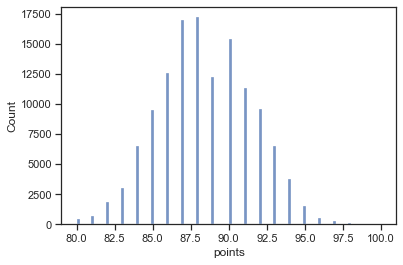

In [163]:
sns.histplot(test1['points'])

<AxesSubplot:ylabel='Count'>

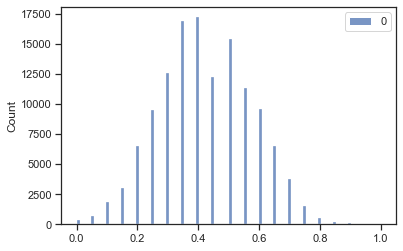

In [164]:
sns.histplot(point_sc_data)

In [165]:
# Масштабируем PRICE
price_scaller = MinMaxScaler()
price_sc_data = price_scaller.fit_transform(new_price)

<AxesSubplot:ylabel='Count'>

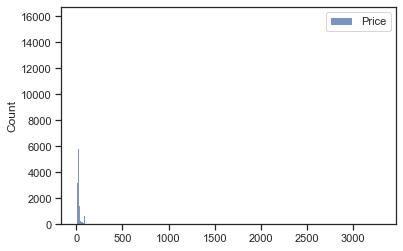

In [166]:
sns.histplot(new_price)

<AxesSubplot:ylabel='Count'>

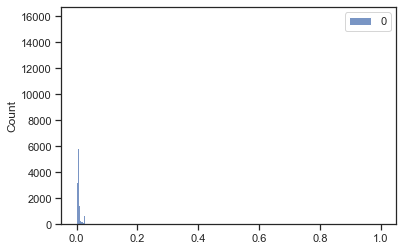

In [167]:
sns.histplot(price_sc_data)

### Масштабирование на основе z-оценки

In [168]:
price_z = StandardScaler()
price_z_data = price_z.fit_transform(new_price)

<AxesSubplot:ylabel='Count'>

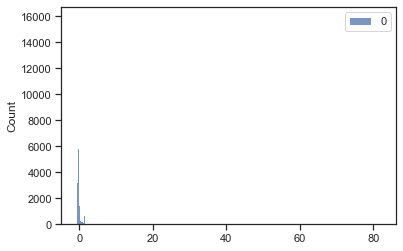

In [169]:
sns.histplot(price_z_data)

In [170]:
points_z = StandardScaler()
points_z_data = points_z.fit_transform(test1[['points']])

<AxesSubplot:ylabel='Count'>

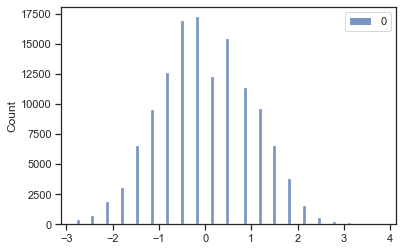

In [171]:
sns.histplot(points_z_data)

In [ ]:
# ЛР2 / ТМО / Кобяка Андрея / ИУ5-62б / 2021